Pratham Javalkoti.

Problem Statement: To find the optimal number of clusters of an Iris Dataset and to represent them visually.

# Step 1: Importing all the necessary libraries.

In [1]:
import pandas
import numpy
import matplotlib.pyplot
import sklearn

# Step 2: Creating the dataframe.

In [2]:
file = "Iris.csv"
myData = pandas.read_csv(file)
print("Dataframe Created.")
myData.head()

Dataframe Created.


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


"Iris.csv" file must be uploaded on the jupyter notebook before executing this. using pandas.read_csv(file) the dataframe will be created. myData.head() will print first five records of the dataframe along with the column headings.

# Step 3: Finding the Optimal Number of Clusters.

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


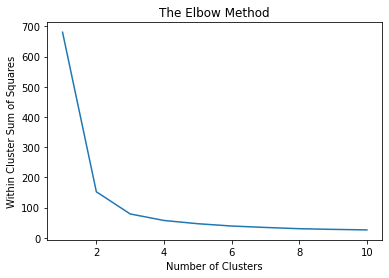

In [3]:
x = myData.iloc[:, [1, 2, 3, 4]].values

# All the records of columns 1, 2, 3, and 4 will be stored in x.

from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
    
# n_clusters = Number of Clusters.
# init = Selects Initial Cluster Centroids.
# max_iter = maximum iterations to be performed.
# n_init = Number of Centroids.
# random state zero.

# Representing the results in visual form.

matplotlib.pyplot.plot(range(1, 11), within_cluster_sum_of_squares)
matplotlib.pyplot.title("The Elbow Method")
matplotlib.pyplot.xlabel("Number of Clusters")
matplotlib.pyplot.ylabel("Within Cluster Sum of Squares")
matplotlib.pyplot.show()

This method of finding the optimal number of clusters is called as elbow method because where ever the elbow occurs in the graph that will be considered as optimal number od clusters. Here in this senario the optimal numbers of clusters is equal to 3.

# Step 4: Creating KMeans Classifier.

In [4]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y = kmeans.fit_predict(x)

# fit_predict() label's the centroids once the clusters are fixed.

# Step 5: Visualizing the Clusters.

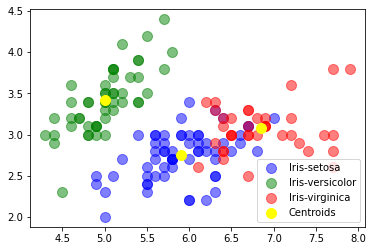

In [17]:
# Visualizing the clusters

matplotlib.pyplot.scatter(x[y==0,0], x[y==0,1], s = 100, alpha = 0.5, c = 'blue', label = 'Iris-setosa')
matplotlib.pyplot.scatter(x[y==1,0], x[y==1,1], s = 100, alpha = 0.5, c = 'green', label = 'Iris-versicolor')
matplotlib.pyplot.scatter(x[y==2,0], x[y==2,1], s = 100, alpha = 0.5, c = 'red', label = 'Iris-virginica')
# Representing the clusters

matplotlib.pyplot.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

matplotlib.pyplot.legend()